In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Data 270/Data

/content/drive/MyDrive/Data 270/Data


In [ ]:
%cd /content

/content


In [ ]:
!pip install easyimages

In [ ]:
# importing libraries
%matplotlib inline
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg

In [ ]:
from skimage import io
def verify_image(img_file):
    try:
        img = io.imread(img_file)
    except:
        return False
    return True

In [ ]:
from easyimages import EasyImage, EasyImageList, bbox

In [ ]:
Li = EasyImageList.from_multilevel_folder('/content/drive/MyDrive/Data 270/Data/')
#Li.symlink_images()
#Li.html(size = 100)
Li
#Li.html()

<ImageList with 21 EasyImages [filter OFF]>

EasyImageObject: 00012_Mask.jpg | labels: ['Person'] | downloaded: True | size: (1024, 1024) |


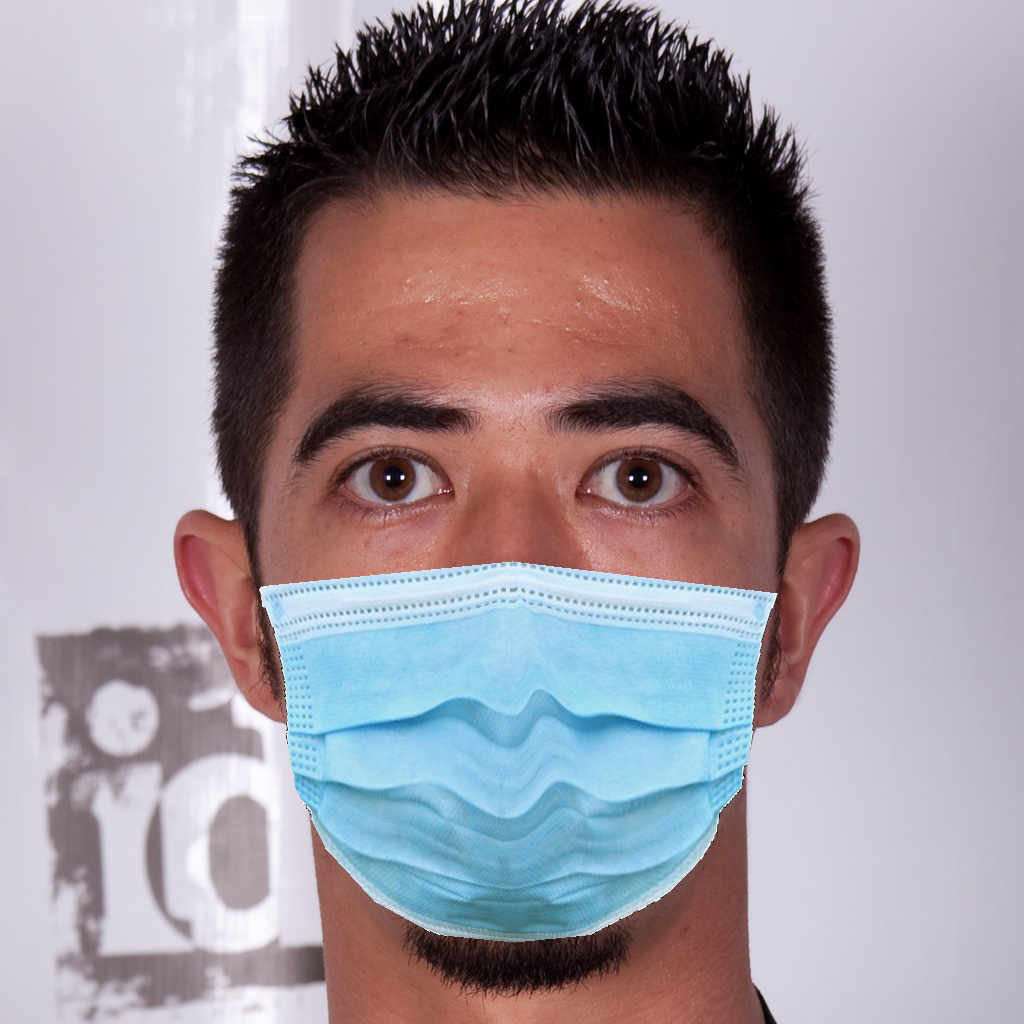

In [ ]:
image1 = EasyImage.from_file('/content/drive/MyDrive/Data 270/Data/00012_Mask.jpg',label=['Person'], lazy=True)
image1.show()

In [ ]:
# Importing and Loading the data into a data frame

dataset_path = '/content/drive/MyDrive/Data 270/Data/'

# apply glob module to retrieve files/pathnames  

img_path = os.path.join(dataset_path, '*')
img_path = glob.glob(img_path)

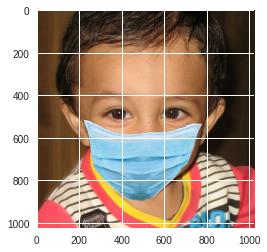

In [ ]:
# accessing an image file from the dataset classes
image = io.imread(img_path[4])  

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

# **Pre-processing**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.figure(figsize = (15,15))
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display three images
def display_three(a, b, c, title1 = "Original", title2 = "Edited", title3 = "Editeds"):
    plt.figure(figsize = (15,15))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()

# **Denoise**

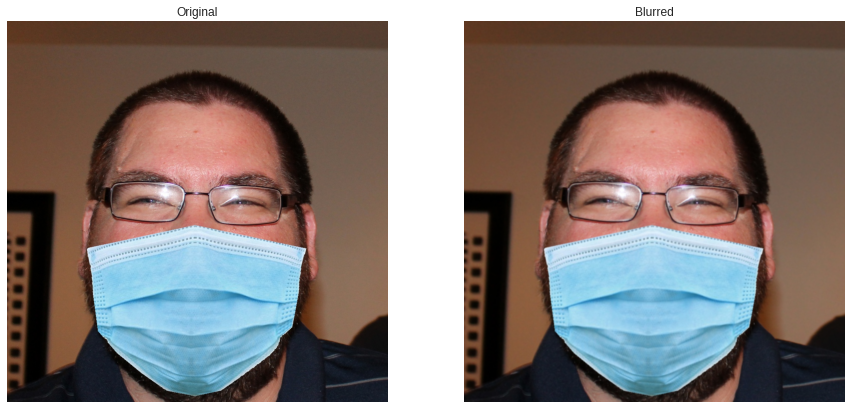

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/Data 270/Data/00023_Mask.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
# Remove noise
# Gaussian
no_noise = []
blur = cv2.GaussianBlur(test_img, (5, 5), 0)


display(test_img, blur, title1 = "Original", title2 = "Blurred")

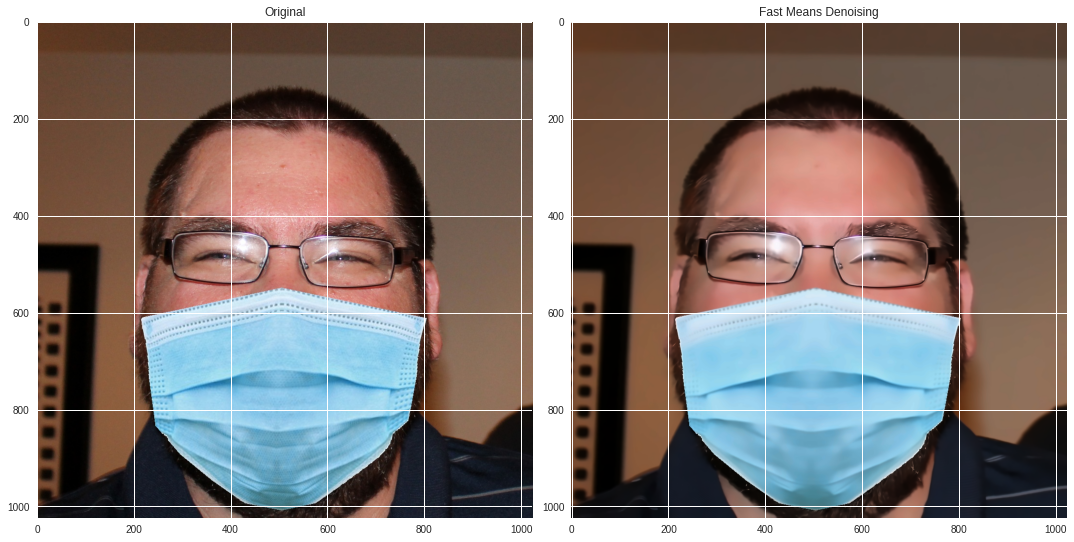

In [ ]:
plt.style.use('seaborn')
 
test_image = cv2.imread('/content/drive/MyDrive/Data 270/Data/00023_Mask.jpg')
dst = cv2.fastNlMeansDenoisingColored(test_image, None, 11, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

# **Segmentation and Morphology**

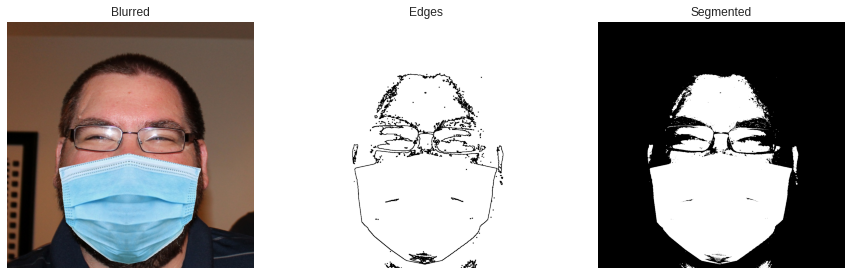

In [ ]:
# Segmentation
grayish = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
rett, threshh = cv2.threshold(grayish, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
edgess = cv2.dilate(cv2.Canny(threshh,0,255),None)
# Displaying segmented images
display_three(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB), edgess, threshh, 'Blurred', 'Edges', 'Segmented')

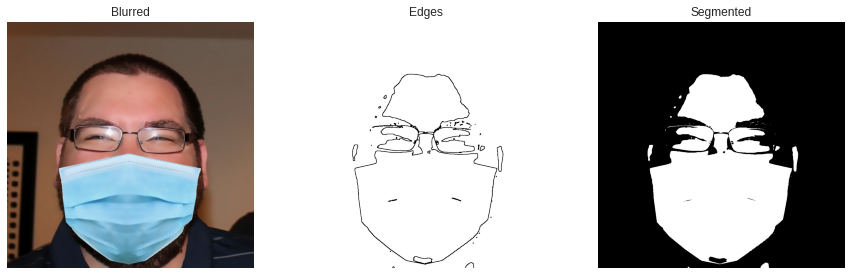

In [ ]:
# Segmentation
gray = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
# Displaying segmented images
display_three(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), edges, thresh, 'Blurred', 'Edges', 'Segmented')

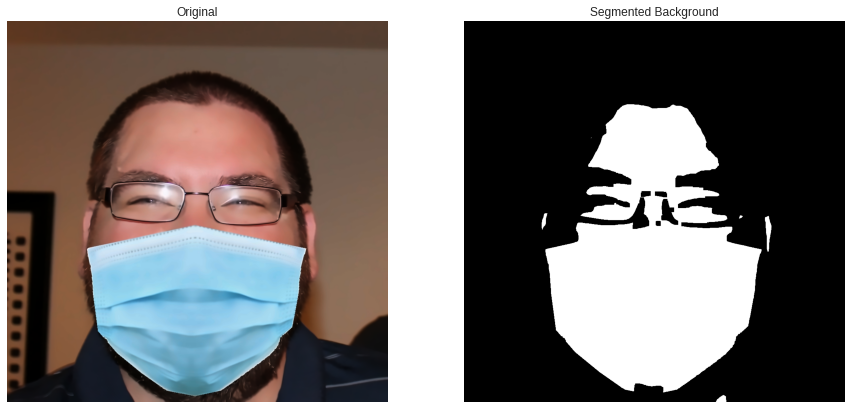

In [ ]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

#Displaying segmented back ground
display(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), sure_bg, 'Original', 'Segmented Background')

# **Program That Returns Images with Noise Based on Threshold**

In [ ]:
import cv2

def is_valid(image):
    # Convert image to HSV color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Calculate histogram of saturation channel
    s = cv2.calcHist([image], [1], None, [256], [0, 256])

    # Calculate percentage of pixels with saturation >= p
    p = 0.1
    s_perc = np.sum(s[int(p * 255):-1]) / np.prod(image.shape[0:2])

    # Percentage threshold; above: valid image, below: noise
    s_thr = 0.5
    return s_perc > s_thr



noise1 = cv2.cvtColor(io.imread('/content/drive/MyDrive/Data 270/Data/00023_Mask.jpg'), cv2.COLOR_RGB2BGR)
is_valid(noise1)

True

In [ ]:
def unique(list1):
    x = np.array(list1)
    print(np.unique(x))


i=0
noisy=[]
currentFolder = '/content/drive/MyDrive/Data 270/Data'
for i, file in enumerate(os.listdir(currentFolder)):
  im = cv2.imread((os.path.join(currentFolder, file)))
  img = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  noisy.append(is_valid(img))
  #print(is_valid(img))

unique(noisy)

[ True]


# **Eyes Detection**

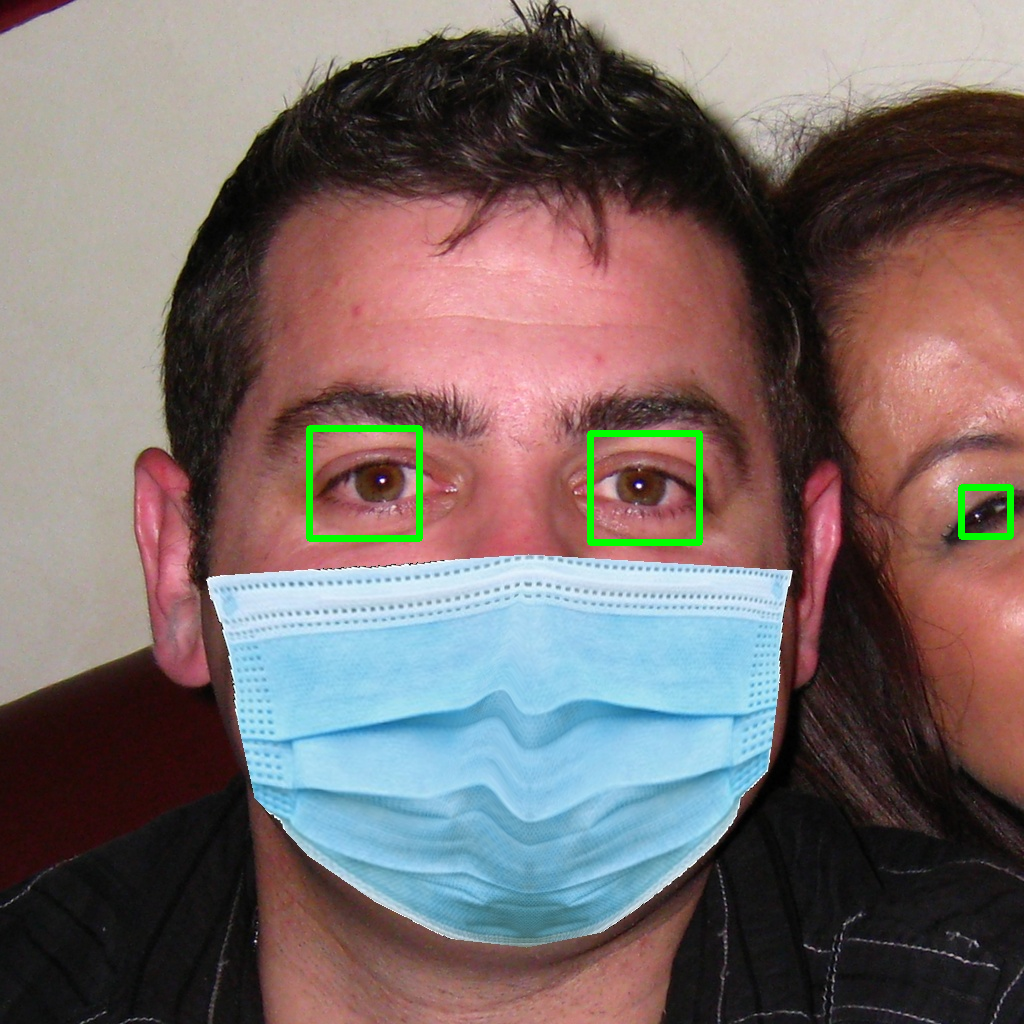

3


In [ ]:
from google.colab.patches import cv2_imshow

test_img = cv2.imread('/content/drive/MyDrive/Data 270/Data/00016_Mask.jpg')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(test_img, scaleFactor = 1.2,minNeighbors = 4)
 
n = 0
for (x,y,w,h) in eyes:
  cv2.rectangle(test_img,(x,y),(x+w,y+h),(0, 255, 0),5)
  n+=1
 
cv2_imshow(test_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(n)

# **Face and Eyes Detection Combined**

882 921


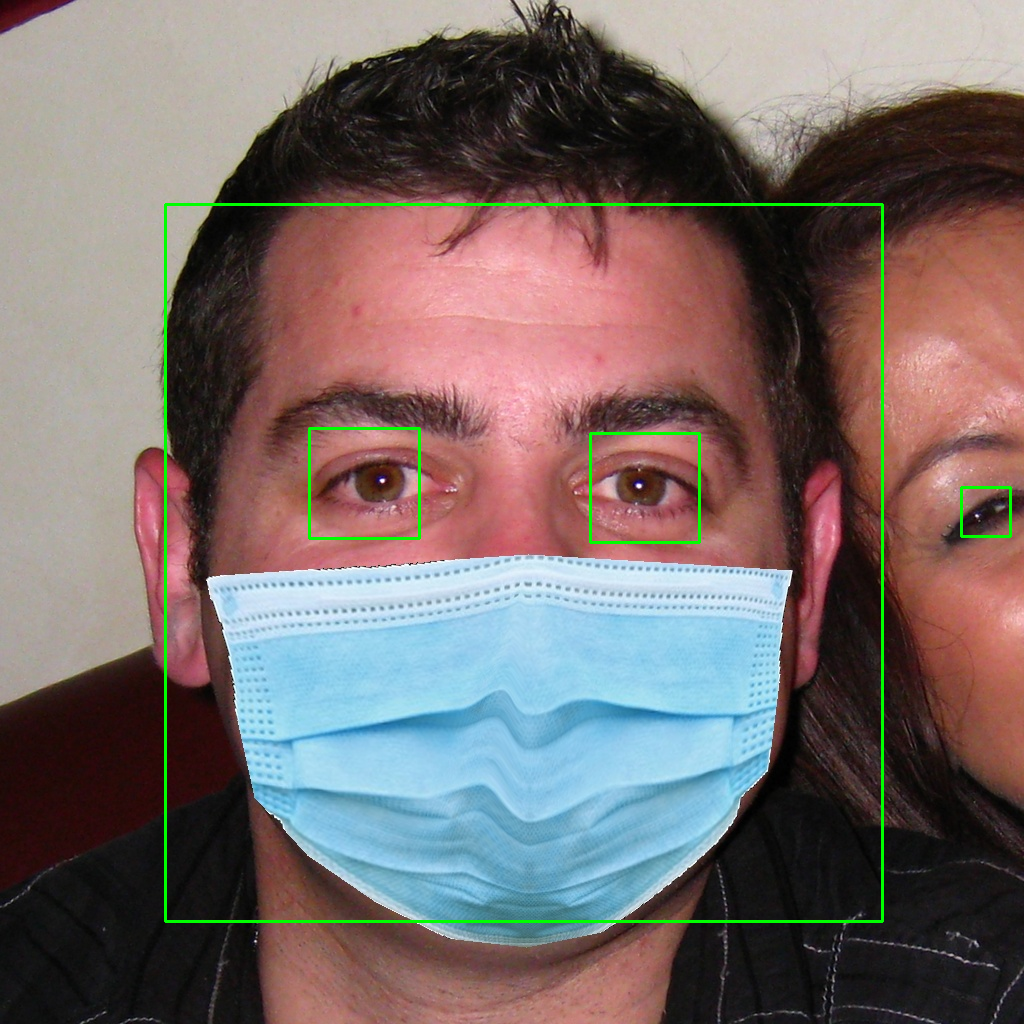

1


In [ ]:
new_img = cv2.imread('/content/drive/MyDrive/Data 270/Data/00016_Mask.jpg')
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
eyes = eye_cascade.detectMultiScale(gray, scaleFactor = 1.2,minNeighbors = 4)
 
n = 0
# Draw a rectangle around the faces
for (x, y, w, h) in faces:
  cv2.rectangle(new_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  n+=1
  print(x+w,y+h)

for (ex,ey,ew,eh) in eyes:
  cv2.rectangle(new_img, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)
 
cv2_imshow(new_img)
cv2.waitKey(0)
print(n)

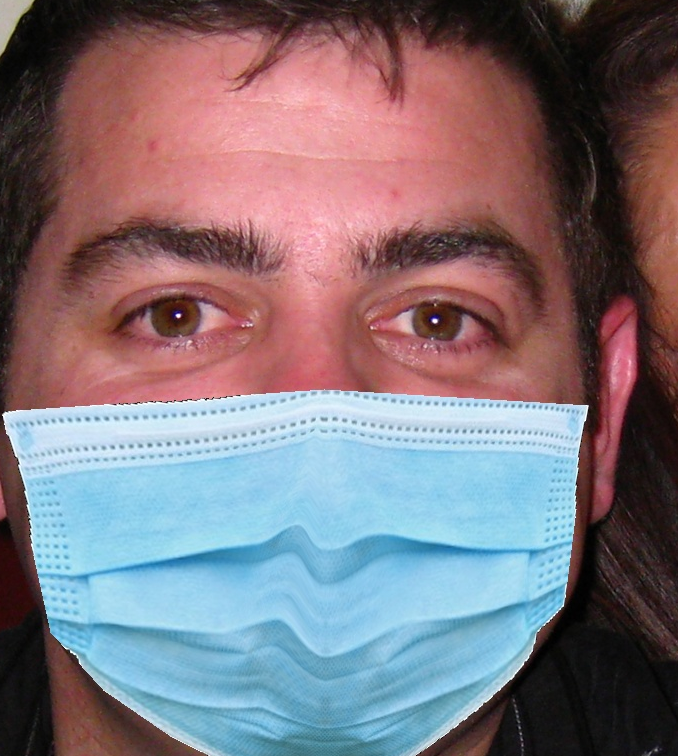

In [ ]:
as_img = cv2.imread('/content/drive/MyDrive/Data 270/Data/00016_Mask.jpg')
cropped_image = as_img[x:y+h, y:x+w]
cv2_imshow(cropped_image)

# **Program that Lists out possible incomplete Images**

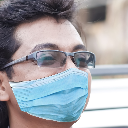

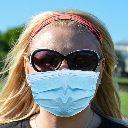

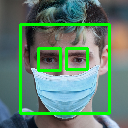

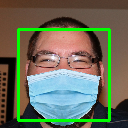

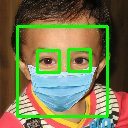

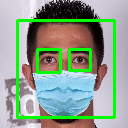

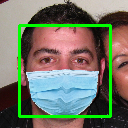

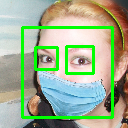

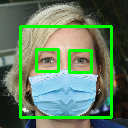

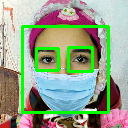

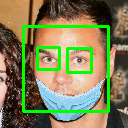

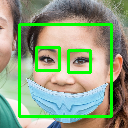

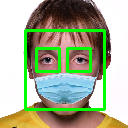

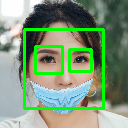

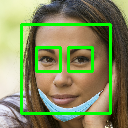

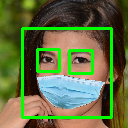

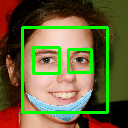

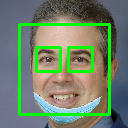

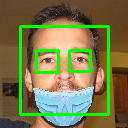

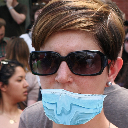

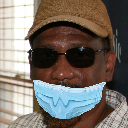

List of possible incomplete images:  ['00009_Mask.jpg', '00025_Mask.jpg', '34791_Mask_Mouth_Chin.jpg', '34831_Mask_Mouth_Chin.jpg']


In [ ]:
k=0
incomplete_df=[]
currentFolder = '/content/drive/MyDrive/Data 270/Data'
for k, file in enumerate(os.listdir(currentFolder)):
  im = cv2.imread((os.path.join(currentFolder, file)))
  resized_image = cv2.resize(im, (128,128))
  img = cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)

  faces = face_cascade.detectMultiScale(img, 1.2, 4)
  eyes = eye_cascade.detectMultiScale(img, scaleFactor = 1.2,minNeighbors = 4)

  n = 0
  # Draw a rectangle around the faces
  for (x, y, w, h) in faces:
    cv2.rectangle(resized_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    n+=1

  #print(n)
  if (n!=1):                                              #If no faces were detected, increment n by 1 -> Add the file name to list of possible incomeplete images
    incomplete_df.append(file)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(resized_image, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)
  
  cv2_imshow(resized_image)
  cv2.waitKey(0)

print('List of possible incomplete images: ', incomplete_df)